# Inaugural Project

Imports and set magics:

In [1]:
import numpy as np

from types import SimpleNamespace
from scipy import optimize
from scipy.optimize import minimize
import pandas as pd 
import matplotlib.pyplot as plt
import math
from matplotlib import ticker

#We immport autoreload modules when code is run, to make sure our notebook has the recent changes from the Python file. 
%load_ext autoreload
%autoreload 2

#We import our python file, where we have set up our model.
import inauguralproject

#We import our class and name it "model".
from inauguralproject import HouseholdClass 
model = HouseholdClass()


# Question 1

In question 1, we want to solve the model discretely, and illustrate how the relative hours worked at home for men and women $\frac{H_F}{H_M}$ change for different values of $\alpha$ and $\sigma$. 

Based on the provided code, we alter the definition of consumption of home goods H in inauguralproject.py, to allow for $\sigma\neq1$. 

Following this, we solve the model discretely, and find the intial optimal working hours for men and women, in the the market and at home for $\alpha=0.5$ and $\sigma=1$

In [2]:
#We initiate and solve the discrete model. 
initial = model.solve_discrete()

#Printing the results
print(f'The initial optimal hours working at home for women is HF = {initial.HF:.1f}' '\n'f'The initial optimal hours working at home for men is HM = {initial.HM:.1f}''\n'f'The initial optimal hours working at the market for women is LF = {initial.LF:.1f}' '\n'f'The initial optimal hours working at the market for men is LM = {initial.LM:.1f}' )


/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:79: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


The initial optimal hours working at home for women is HF = 4.5
The initial optimal hours working at home for men is HM = 4.5
The initial optimal hours working at the market for women is LF = 4.5
The initial optimal hours working at the market for men is LM = 4.5


In the following, we show how relative optimal working hours at home between men and women change dependent on different values of $\sigma$ and $\alpha$. We illustrate this in a table. 

____

In [3]:
#We unpack the model parameters
par = model.par

#We define vectors with the values of alpha and sigma.
alpha_vec = [0.25,0.5,0.75]
sigma_vec = [0.5,1,1.5]

#We create a table with the logarithm of the relative hours worked at home for men and women. 
def print_table():
    
    #We define an empty text string
    text = ''
    
    # Creating the top header of the table, we loop over the different values of sigma in the vector
    text += f'{"Alpha/Sigma |":3s}'
    for j, sigma in enumerate(sigma_vec): 
       model.par.sigma=sigma
       text += f'{sigma:8.2f}' 
    text += '\n' + "-"*40 + "\n" #We create a line shift and a line to divide the header from the rest of the table. 
    
    # Creating the body of the table. We loop over the different values of alpha in the vector and fill the table with the optimal relative at home working hours defined as "initial"
    for i, alpha in enumerate(alpha_vec): 
        model.par.alpha=alpha
        if i > 0:
            text += '\n' #We create a line shift
        text += f'{alpha:8.2f}    |' #Creating the left header with a line to divide it from the rest of the table. 
        for j, sigma in enumerate(sigma_vec):
            model.par.sigma=sigma
            disc = model.solve_discrete()
            text += f'{disc.HF/disc.HM:8.2f}' 
    
    # Print
    print(text)

#We print the table: 
print_table()

/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:75: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:75: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Alpha/Sigma |    0.50    1.00    1.50
----------------------------------------
    0.25    |    0.55    0.31    0.21
    0.50    |    1.00    1.00    1.00
    0.75    |    1.83    3.25    4.67


For $\alpha=0.5$ men and women are equally productive in the home production, why the relative hours spend on home production are the same regardsless of $\sigma$. The higher $\alpha$, the more productive women are in the home compared to men, thus the more women will work at home relative to men. As the elasticity of substitution $\sigma$ increases, what happens to the relative working hours at home differs depending on $\alpha$.  

We now want to illustrate the results in a 3D plot

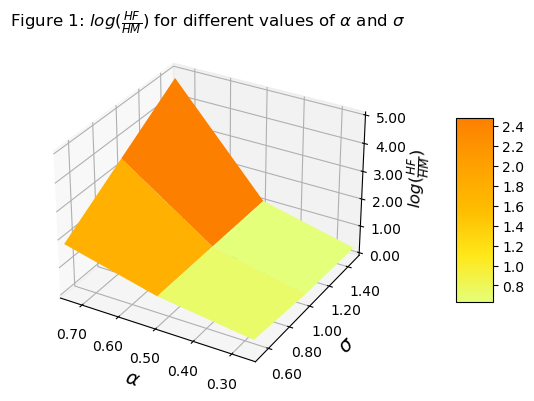

In [76]:
# We create a 2D grid of alpha and sigma
alpha_grid, sigma_grid = np.meshgrid(alpha_vec,sigma_vec)

# We want to create a matrix of HF/HM and loop through the grids of alpha and sigma. 
log_rel_hours= np.zeros([3,3])
for i in range(alpha_grid.shape[0]):
    for j in range(sigma_grid.shape[0]):
        model.par.alpha = alpha_grid[i,j]
        model.par.sigma = sigma_grid[i,j]
        disc = model.solve_discrete()
        log_rel_hours[i,j] = disc.HF/disc.HM

# We create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
fig1 = ax.plot_surface(alpha_grid,sigma_grid,log_rel_hours,cmap='Wistia')
ax.set(xlim=(0.25, 0.75), ylim=(0.5,1.5), zlim=(0,5))
ax.set_title("Figure 1: " r"$log(\frac{HF}{HM})$" " for different values of " r"$\alpha$" " and " r"$\sigma$" )
ax.invert_xaxis()
cbar=fig.colorbar(fig1, shrink=0.5, aspect=5 ,pad = 0.15)
cbar.ax.locator_params(nbins=10)

#We add labels 
ax.set_xlabel(r"$\alpha$", fontsize=14)
ax.set_ylabel(r"$\sigma$", fontsize=14)
ax.set_zlabel(r"$log(\frac{HF}{HM})$", fontsize=12)

#We change the decimals on the axis
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.zaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))

# Question 2

We now return to $\alpha=0.5$ and $\sigma=1$. 
We vary the female wage $w_F$ and illustrate how it changes $log\frac{H_F}{H_M}$ and $log\frac{w_F}{w_M}$.

In [78]:
#We initiate a new model
model2 = HouseholdClass()

#We unpack the model parameters
par = model2.par

#We construct an empty list to hold the log value of the relative hours between men and women
log_rel_hours_list=[]

#We run a loop over the model where we change women's wage for each iteration
for wage in par.wF_vec:
    par.wF = wage
    opt = model2.solve_discrete()    

    #We calculate the model results for each iteration
    rel_hours = opt.HF/opt.HM
    log_rel_hours = np.log(rel_hours)

    log_rel_wage = np.log(par.wF_vec)

    #We append the results to our list of log values
    log_rel_hours_list = np.append(log_rel_hours_list, log_rel_hours)
 
    #We print our results
    print(f'When womens wage is {wage:.1f} and mens wage is wM = {par.wM:.1f}, the optimal working hours at home are {opt.HF:.1f} for women and {opt.HM:.1f} for men.' '\n' f'Thus, their relative working hours are {rel_hours:.3f}. Taking the log of this fraction, we find log(HF/HM) = {log_rel_hours:.3f}.''\n')

/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:79: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


When womens wage is 0.8 and mens wage is wM = 1.0, the optimal working hours at home are 5.0 for women and 4.0 for men.
Thus, their relative working hours are 1.250. Taking the log of this fraction, we find log(HF/HM) = 0.223.

When womens wage is 0.9 and mens wage is wM = 1.0, the optimal working hours at home are 4.5 for women and 4.5 for men.
Thus, their relative working hours are 1.000. Taking the log of this fraction, we find log(HF/HM) = 0.000.

When womens wage is 1.0 and mens wage is wM = 1.0, the optimal working hours at home are 4.5 for women and 4.5 for men.
Thus, their relative working hours are 1.000. Taking the log of this fraction, we find log(HF/HM) = 0.000.

When womens wage is 1.1 and mens wage is wM = 1.0, the optimal working hours at home are 4.0 for women and 4.5 for men.
Thus, their relative working hours are 0.889. Taking the log of this fraction, we find log(HF/HM) = -0.118.

When womens wage is 1.2 and mens wage is wM = 1.0, the optimal working hours at home ar

We now want to illustrate this in a scatterplot.

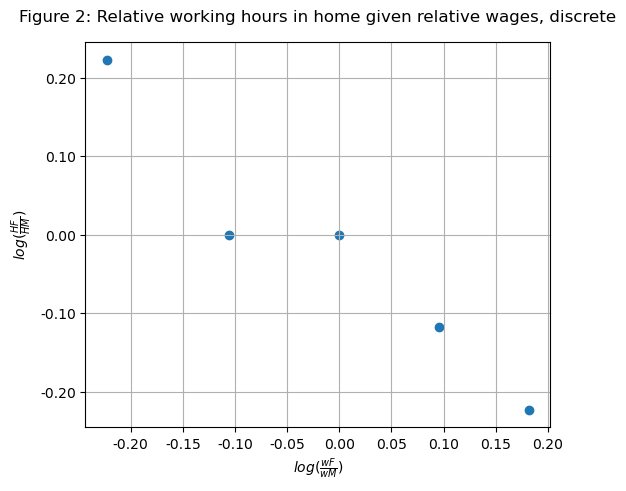

In [79]:
#We define the log of relative wages
log_rel_wage_list=np.log(par.wF_vec/par.wM)

#We create the scatterplot, set labels, title, grid etc. 
fig,ax = plt.subplots(figsize=(6,5))
ax.scatter(x=log_rel_wage_list,y=log_rel_hours_list)
ax.set(xlabel= r"$log(\frac{wF}{wM})$",ylabel=r"$log(\frac{HF}{HM})$")
ax.set_title('Figure 2: Relative working hours in home given relative wages, discrete',pad=15)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.grid()

# Question 3

Now, the model is continuous.
We vary the female wage $w_F$ and illustrate how it changes $log\frac{H_F}{H_M}$ and $log\frac{w_F}{w_M}$.
We solve the model continuously in inauguralproject.py with $\alpha=0.5$ and $\sigma=1$

In [80]:
#We refer to the class
model_cont = HouseholdClass() 

#We define the continuous solution
cont = model_cont.solve_continuous()

/Users/idahougaard/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


In [81]:
#We print the results of the continuous model
print(f'The initial optimal hours working at home for women is HF = {cont.HF:.2f}' '\n'f'The initial optimal hours working at home for men is HM = {cont.HM:.2f}''\n'f'The initial optimal hours working at the market for women is LF = {cont.LF:.2f}' '\n'f'The initial optimal hours working at the market for men is LM = {cont.LM:.2f}' )

The initial optimal hours working at home for women is HF = 4.45
The initial optimal hours working at home for men is HM = 4.45
The initial optimal hours working at the market for women is LF = 4.45
The initial optimal hours working at the market for men is LM = 4.45


We now want to vary the female wage wF.

In [82]:
# We unpack the model parameters
par = model_cont.par
sol = model_cont.sol

#We set our values for alpha and sigma
model.par.alpha=0.5
model.par.sigma=1

# We create an empty list
log_rel_hours_cont_list=[]

# Looping over wF values
for wage in par.wF_vec:
    
    # Setting value
    par.wF = wage

    # Solving for continuous optimal choice
    opt_cont = model_cont.solve_continuous()

    # We create log(HM/HF)
    rel_hours_cont = opt_cont.HF/opt_cont.HM
    log_rel_hours_cont = np.log(rel_hours_cont)

    # We create log(wF/wM)
    log_rel_wage = np.log(par.wF_vec)

    #We append the results to the empty list
    log_rel_hours_cont_list = np.append(log_rel_hours_cont_list, log_rel_hours_cont)

    #Append results to vectors of solutions
    sol.LM_vec = np.append(sol.LM_vec, opt_cont.LM)
    sol.HM_vec = np.append(sol.HM_vec, opt_cont.HM)
    sol.LF_vec = np.append(sol.LF_vec, opt_cont.LF)
    sol.HF_vec = np.append(sol.LF_vec, opt_cont.HF)

    #We print our results
    print(f'When womens wage is {wage:.2f} and mens wage is wM = {par.wM:.2f}, the optimal working hours at home are {opt_cont.HF:.2f} for women and {opt_cont.HM:.2f} for men.' '\n' f'Thus, their relative working hours are {rel_hours_cont:.3f}. Taking the log of this fraction, we find log(HF/HM) = {log_rel_hours_cont:.3f}.''\n')


When womens wage is 0.80 and mens wage is wM = 1.00, the optimal working hours at home are 5.12 for women and 4.09 for men.
Thus, their relative working hours are 1.250. Taking the log of this fraction, we find log(HF/HM) = 0.223.

When womens wage is 0.90 and mens wage is wM = 1.00, the optimal working hours at home are 4.75 for women and 4.27 for men.
Thus, their relative working hours are 1.111. Taking the log of this fraction, we find log(HF/HM) = 0.105.

When womens wage is 1.00 and mens wage is wM = 1.00, the optimal working hours at home are 4.45 for women and 4.45 for men.
Thus, their relative working hours are 1.000. Taking the log of this fraction, we find log(HF/HM) = 0.000.

When womens wage is 1.10 and mens wage is wM = 1.00, the optimal working hours at home are 4.22 for women and 4.64 for men.
Thus, their relative working hours are 0.909. Taking the log of this fraction, we find log(HF/HM) = -0.095.

When womens wage is 1.20 and mens wage is wM = 1.00, the optimal workin

We create a scatterplot of the results.

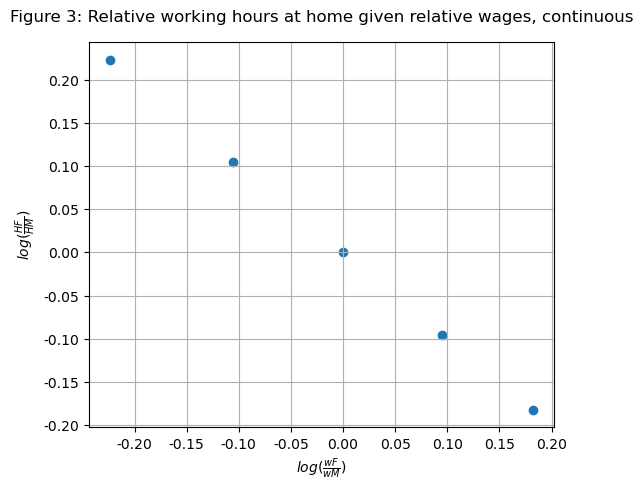

In [83]:
#We define the log of relative wages
log_rel_wage_cont_list=np.log(par.wF_vec/par.wM)

#We create the scatterplot, set labels, title, grid etc. 
fig,ax = plt.subplots(figsize=(6,5))
ax.scatter(x=log_rel_wage,y=log_rel_hours_cont_list)
ax.set(xlabel=r"$log(\frac{wF}{wM})$",ylabel=r"$log(\frac{HF}{HM})$")
ax.set_title('Figure 3: Relative working hours at home given relative wages, continuous',pad=15)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.grid()

Jeg har prøvet af lave et loop hvor vi kører begge figurerne fra Q2 og Q3. 
Problem: hvordan kalder jeg kun den ene ?

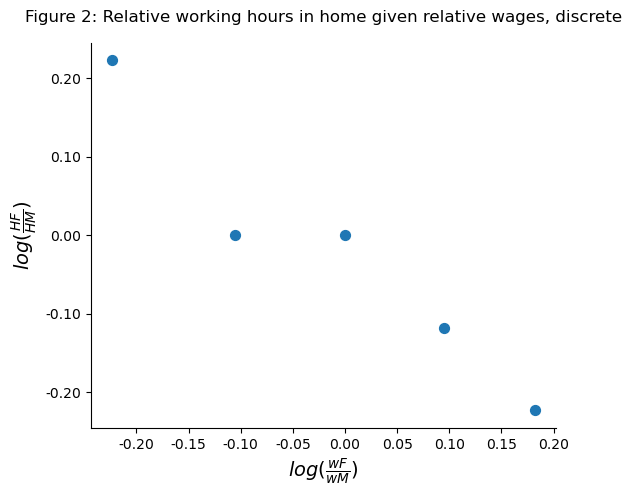

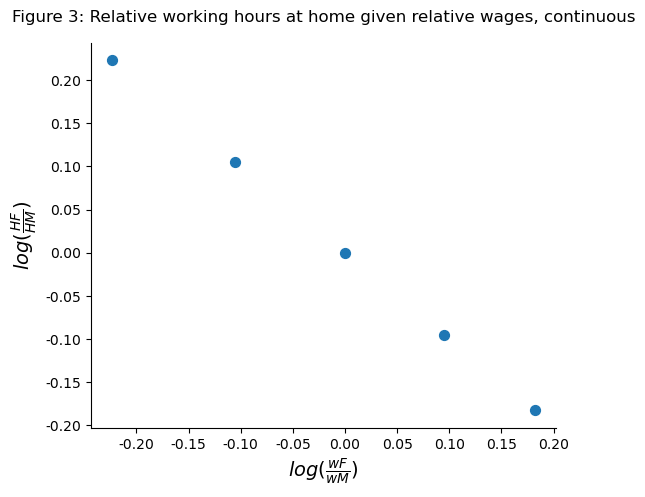

In [168]:
#attempting to create a loop for question 2 and 3:
x = [[log_rel_wage_list],[log_rel_wage_list]]
y = [[log_rel_hours_list],[log_rel_hours_cont_list]]
title = ['Figure 2: Relative working hours in home given relative wages, discrete','Figure 3: Relative working hours at home given relative wages, continuous']

def figur():
    for i in range(len(x)):
        fig,ax = plt.subplots(figsize=(6,5))
        ax.scatter(x[i],y[i],s=50)
        ax.set_xlabel(r"$log(\frac{wF}{wM})$",fontsize=14)
        ax.set_ylabel(r"$log(\frac{HF}{HM})$",fontsize=14)          
        ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
        ax.set_title(title[i],pad=15)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

figur()

# Question 4


We solve the continuous model for each value of the female wage $w_F$ and save our solutions for HF, HM, LF, LM in vectors. We use these vectors to run the regression on our data and find $\hat\beta_0$ and $\hat\beta_1$. This is done in inauguralproject.py.

In [22]:
#We solve the model for each value of female wage wF
model.solve_wF_vec(discrete=False)

#We run the regression
model.run_regression()

Then we find the values of $\sigma$ and $\alpha$ that minimises the squared error given by $(\beta_0-\hat\beta_0)^2+(\beta_1-\hat\beta_1)^2$, thus mimicking the results found in the article by Siminski and Yetsenga (2022).

In [23]:
#We run the results of the minimization
model.estimate()

#Print results
print(f'The values of sigma and alpha that minimize the squared errors are sigma = {model.sol.sigma:.3f} and alpha={model.sol.alpha:.3f}.')
print(f'With these parameters, our model beta_0 = {model.sol.beta0:.3f} and our model beta_1 ={model.sol.beta1:.3f}.')

/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:69: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


The values of sigma and alpha that minimize the squared errors are sigma = 0.100 and alpha=0.982.
With these parameters, our model beta_0 = 0.400 and our model beta_1 =-0.100.


An $\alpha=0.982$ implies that females are more productive when working in the home when compared to men. Men and women are equally productive when $\alpha=0.5$.

A $\sigma=0.100$ implies that a low degree of substitution between men and women.

$\beta_1=-0.1$ implies that a 1% change in the relative wages between women and men, will result in a 0,1% change in the relative working hours between men and women. Thus, as women earn relatively more on the labor market their hours spent working a home will fall. However, due a low degree of substitution, an increase in relative wages does not correspond in an equal change in relative working hours at home.

If the relative wages are the same the second term in the regression equation in Siminski and Yetsenga (2022) becomes zero. So if wages are the same for men and women, women will still work more in the home than men, as $log(\frac{H_F}{H_M})=\beta_0=0.4>0$. 

We now want to plot how well the model from Siminski and Yetsenga (2022) fits the data.

In [6]:
#We define the regression from Siminski and Yetsenga
y = par.beta0_target+par.beta1_target*log_rel_wage

#We find and save the vector of optimal relative working hours, when alpha = 0,982 and sigma = 0,1
log_rel_hours4 = np.log(model.sol.HF_vec/model.sol.HM_vec)

/var/folders/h0/y0qvwgrx3cgbctfpylz6ksgc0000gn/T/ipykernel_4076/2010346776.py:5: RuntimeWarning: invalid value encountered in true_divide
  log_rel_hours4 = np.log(model.sol.HF_vec/model.sol.HM_vec)


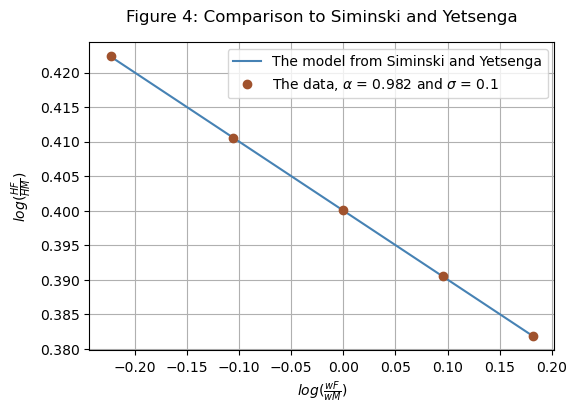

In [34]:
#We create our figure
fig,ax = plt.subplots(figsize=(6,4))
ax.plot(log_rel_wage,y, label="The model from Siminski and Yetsenga", c='steelblue')
ax.plot(log_rel_wage,log_rel_hours4, '.',markersize=12, c='sienna', label=r"The data, $\alpha$ = 0.982 and $\sigma$ = 0.1")
ax.set(xlabel=r"$log(\frac{wF}{wM})$",ylabel=r"$log(\frac{HF}{HM})$")
ax.legend()
ax.set_title('Figure 4: Comparison to Siminski and Yetsenga',pad=15)
ax.grid()


We find that the model fits our data perfectly, when we have minimized the errors. 

# Question 5

We imagine a reform, where men are forced to work twice as much at home than at the market. We change the relative time spent working at the market and at home for men $T_M$. We reset the $\alpha$ and $\sigma$ parameters. 

In [3]:
model.par.alpha=0.5
model.par.sigma=1

We solve the model for the different female wages with the extension

In [4]:
# We unpack the model parameters
par = model.par
sol = model.sol

# We create an empty list
log_rel_hours_ext_list=[]

# Looping over wF values
for wage in par.wF_vec:
    
    # Setting value
    par.wF = wage

    # Solving for continuous optimal choice
    opt_ext = model.solve_continuous_ext()

    # We create log(HM/HF)
    rel_hours_ext = opt_ext.HF_vec_ext/opt_ext.HM_vec_ext
    log_rel_hours_ext = np.log(rel_hours_ext)

    # We create log(wF/wM)
    log_rel_wage = np.log(par.wF_vec)

    #We append the results to the empty list
    log_rel_hours_ext_list = np.append(log_rel_hours_ext_list, log_rel_hours_ext)

    #Append results to vectors of solutions
    sol.LM_vec_ext = np.append(sol.LM_vec_ext, opt_ext.LM_vec_ext)
    sol.HM_vec_ext = np.append(sol.HM_vec_ext, opt_ext.HM_vec_ext)
    sol.LF_vec_ext = np.append(sol.LF_vec_ext, opt_ext.LF_vec_ext)
    sol.HF_vec_ext = np.append(sol.HF_vec_ext, opt_ext.HF_vec_ext)

/Users/idahougaard/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


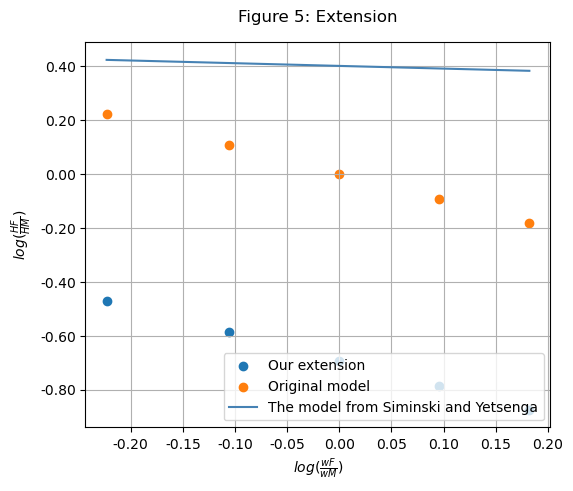

In [19]:
#We create the scatterplot, set labels, title, grid etc. 
fig,ax = plt.subplots(figsize=(6,5))
ax.scatter(x=log_rel_wage,y=log_rel_hours_ext_list, label="Our extension")
ax.scatter(x=log_rel_wage,y=log_rel_hours_cont_list, label="Original model")
ax.plot(log_rel_wage,y, label="The model from Siminski and Yetsenga", c='steelblue')
ax.set(xlabel=r"$log(\frac{wF}{wM})$",ylabel=r"$log(\frac{HF}{HM})$")
ax.set_title('Figure 5: Extension',pad=15)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.grid()
ax.legend(loc=4)

The extension did not make the data fit 